**libiraries**

In [377]:
import os
import joblib
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

**load data**

In [378]:
BASE_DIR = '/kaggle/input/heart-disease-dataset'
WORKING_DIR = '/kaggle/working'

In [379]:
file_path = os.path.join(BASE_DIR,'heart.csv')
df = pd.read_csv(file_path)

In [380]:
df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**EDA**

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [382]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [383]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [384]:
df.shape

(1025, 14)

In [385]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [386]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

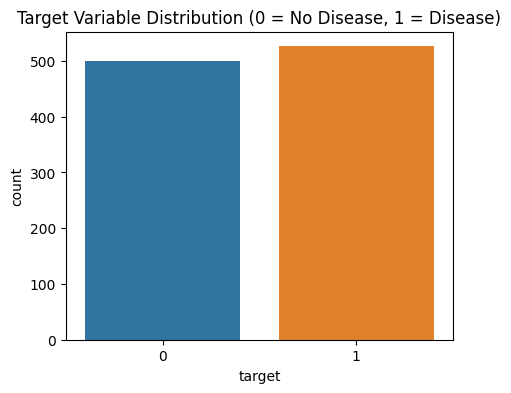

In [387]:
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution (0 = No Disease, 1 = Disease)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

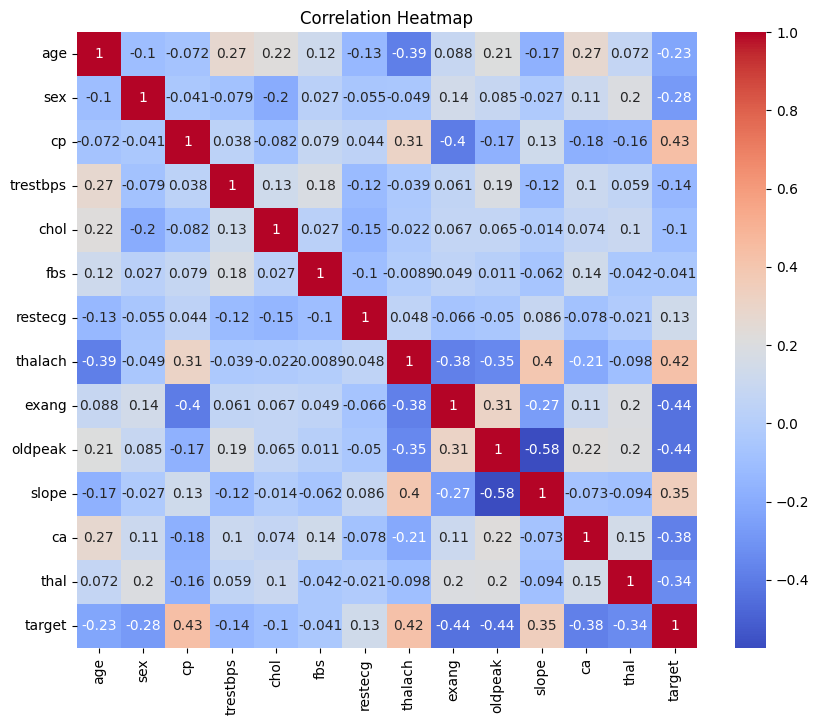

In [388]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show

**Cleaning**

In [389]:
df = df.dropna()

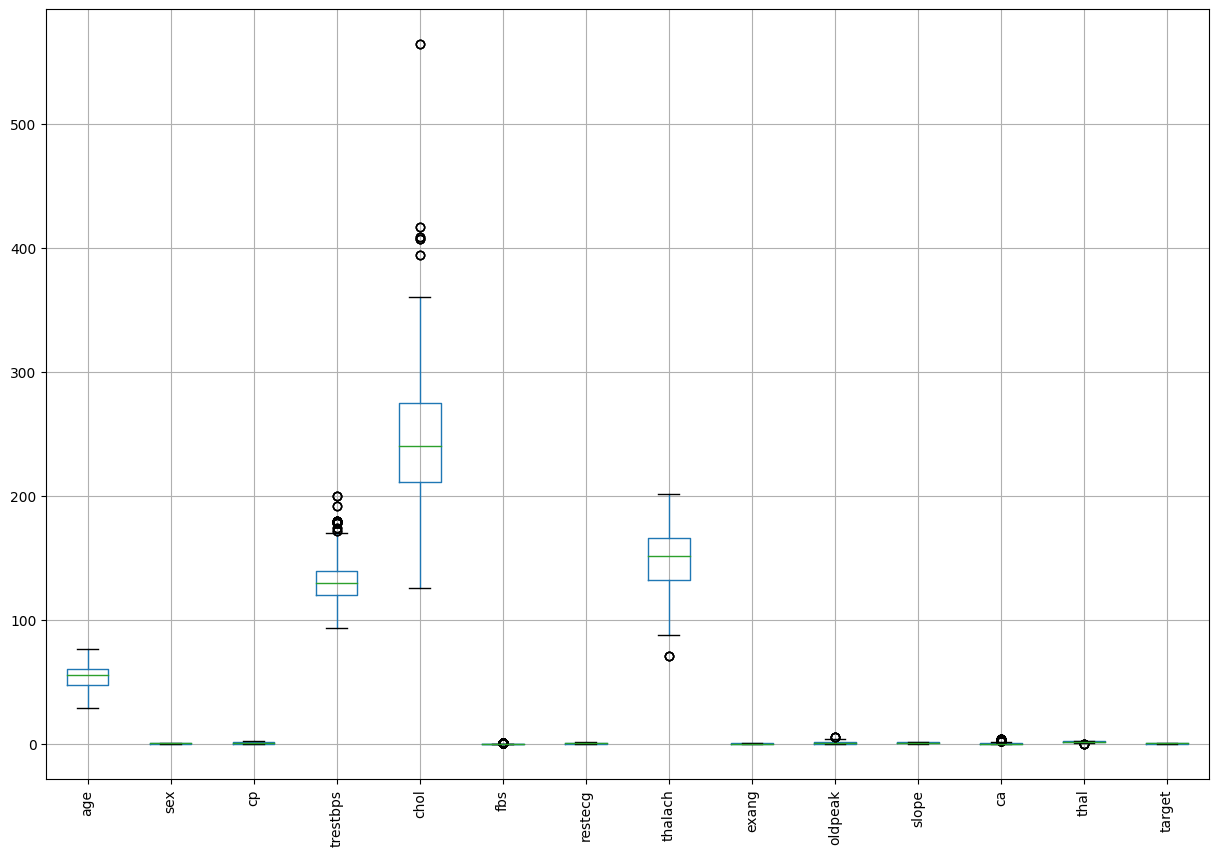

In [390]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [391]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

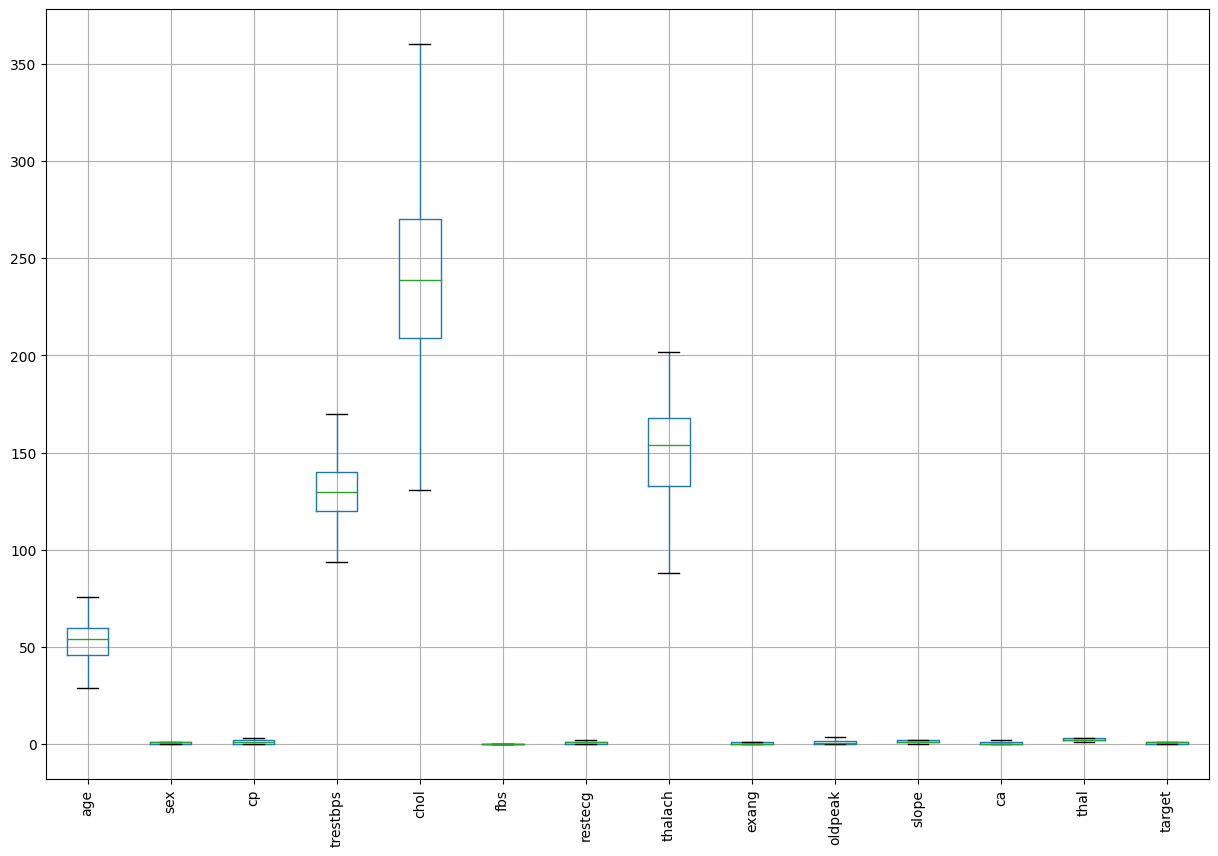

In [392]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [393]:
df = pd.get_dummies(df, drop_first=True)

In [394]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(scaled_data, columns=df.drop('target', axis=1).columns)
df_scaled['target'] = df['target'].values

<function matplotlib.pyplot.show(close=None, block=None)>

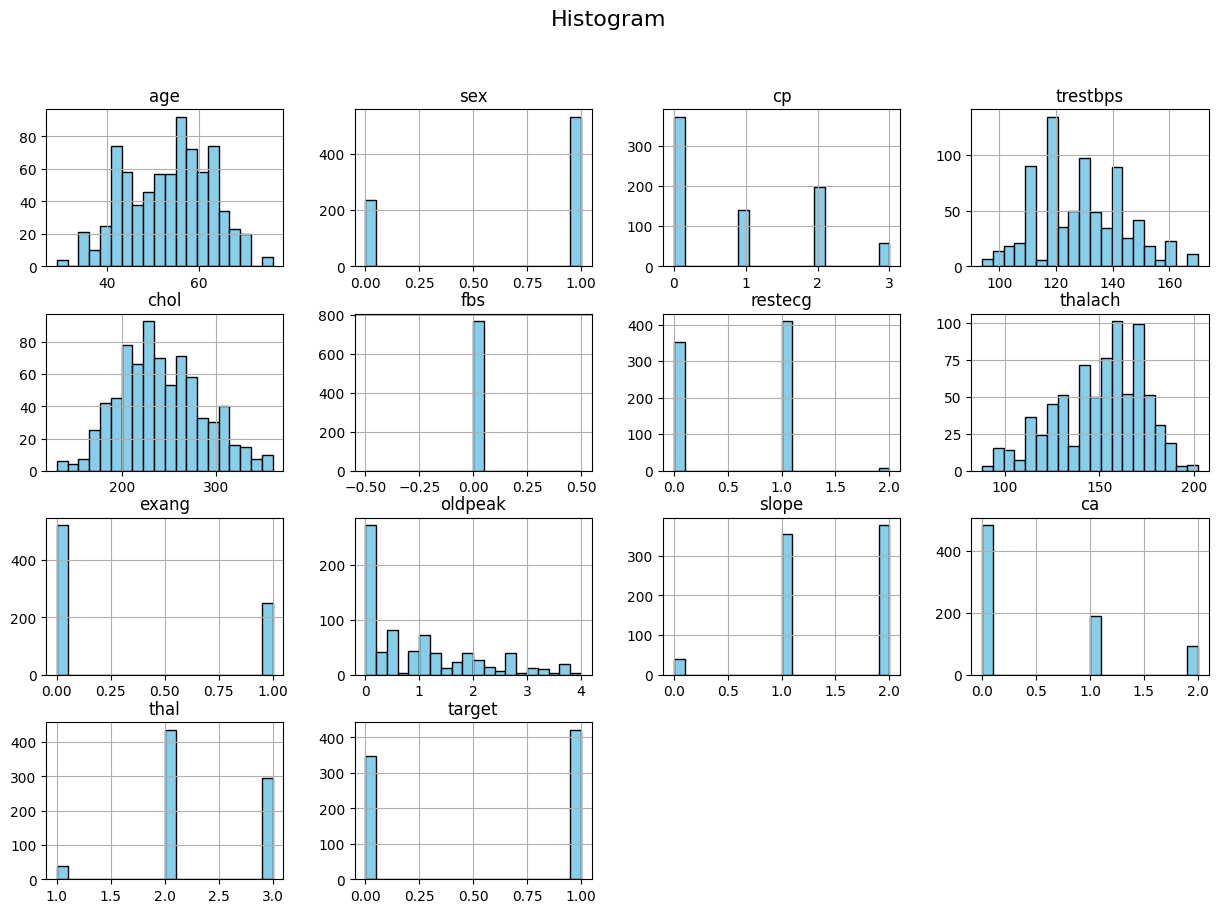

In [395]:
df.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram", fontsize=16)
plt.show

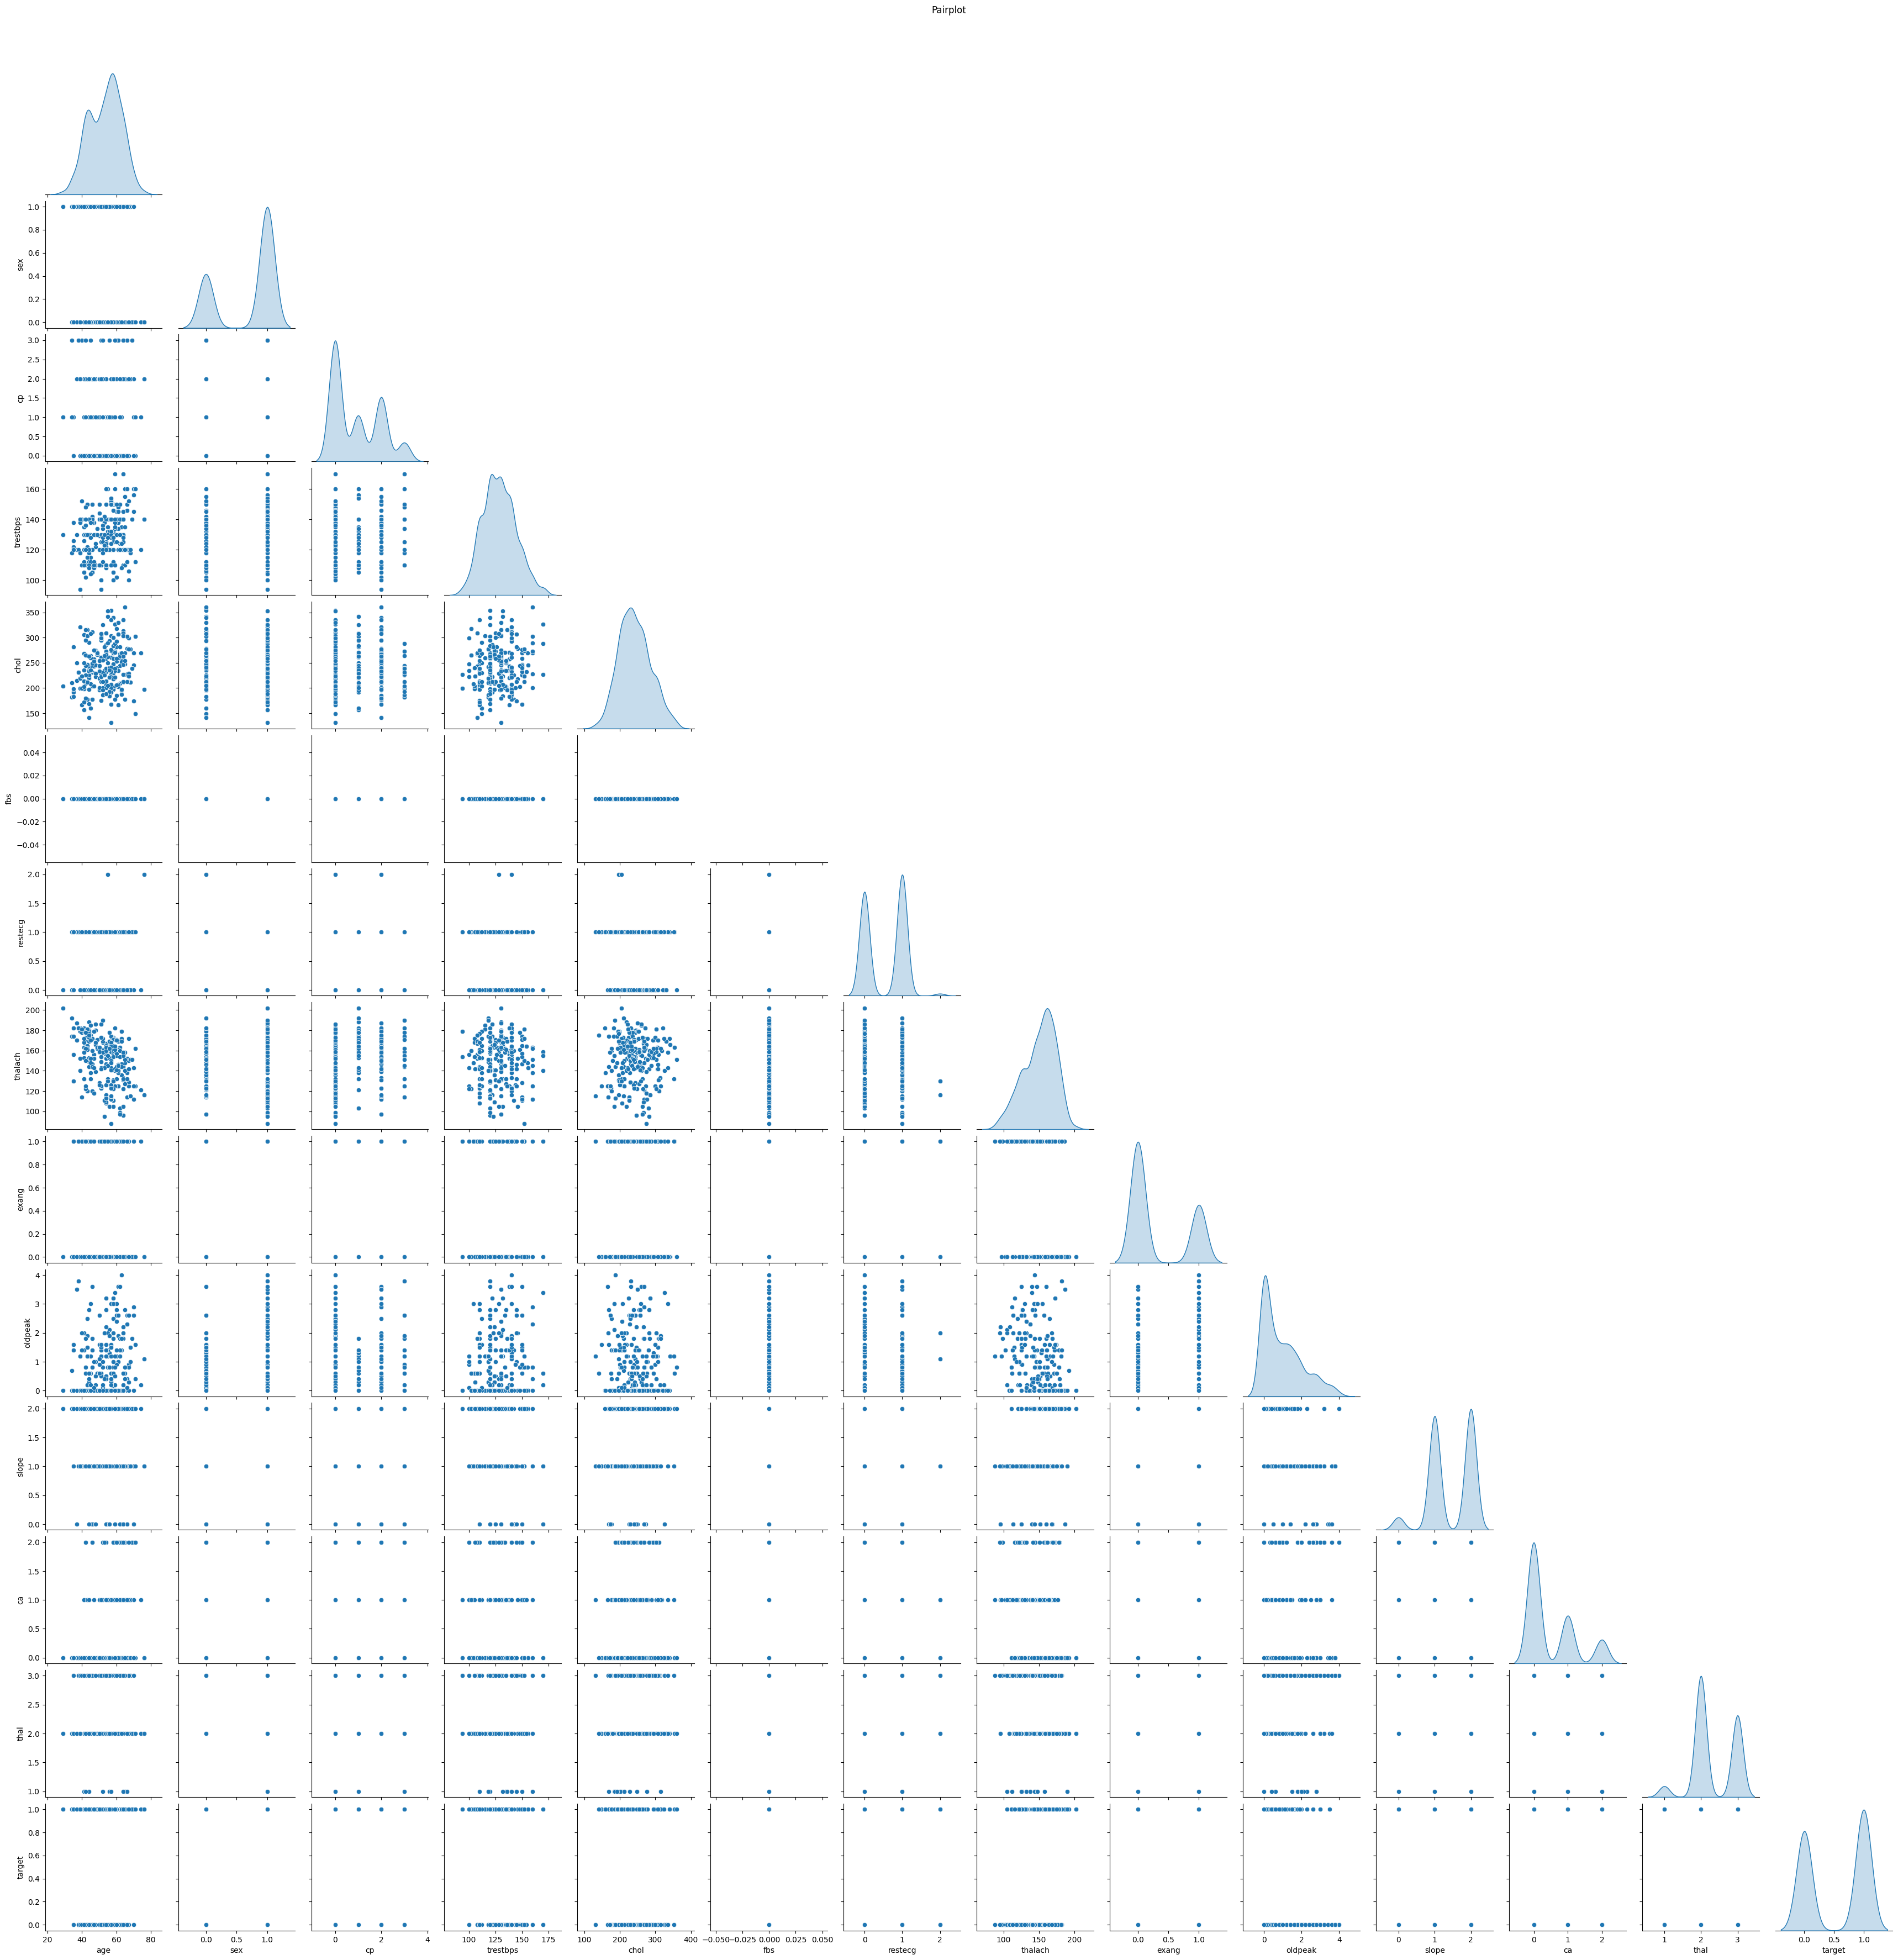

In [396]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot", y=1.02)
plt.show()

**classification**

In [397]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

print("\nNumber of unique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

for col in categorical_cols:
    print(f"\nValue distribution for {col}:")
    print(df[col].value_counts())


Categorical columns: []
Numerical columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Number of unique values per column:
age: 40
sex: 2
cp: 4
trestbps: 38
chol: 132
fbs: 1
restecg: 3
thalach: 81
exang: 2
oldpeak: 35
slope: 3
ca: 3
thal: 3
target: 2


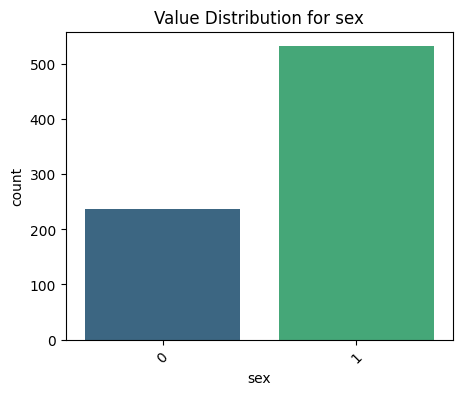

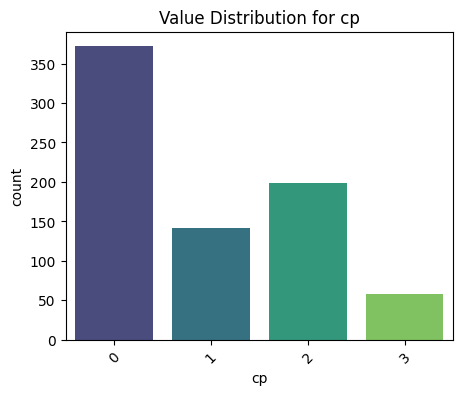

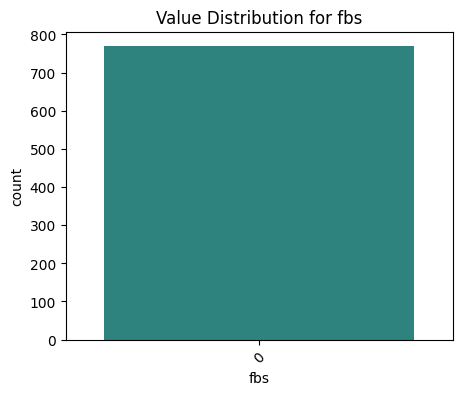

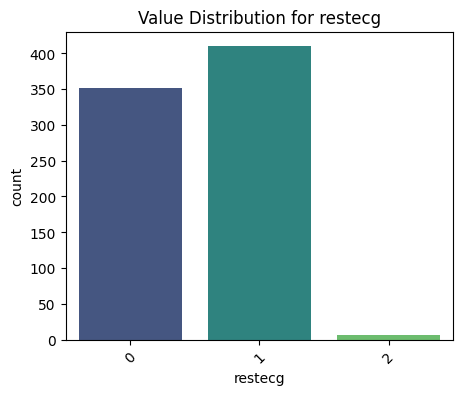

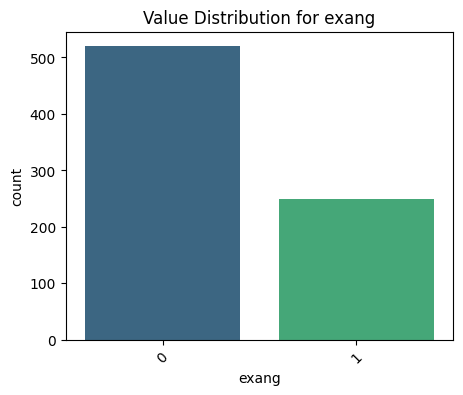

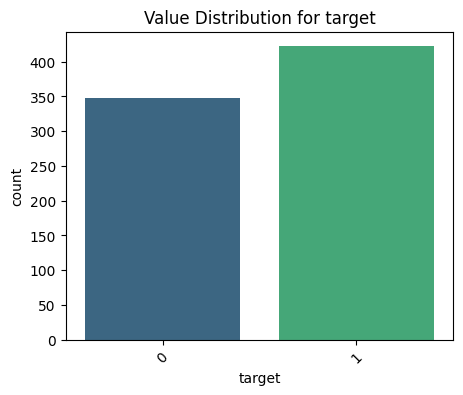

In [398]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']

for col in categorical_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Value Distribution for {col}")
    plt.xticks(rotation=45)
    plt.show()

**train & test split, training and performance**

In [399]:
X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (615, 13)
Testing data shape: (154, 13)


In [400]:
models = {
    # Supervised
    "LogisticRegression": Pipeline([("scaler", StandardScaler(with_mean=False)), ("clf", LogisticRegression(max_iter=1000))]),
    "LinearSVM":          Pipeline([("scaler", StandardScaler(with_mean=False)), ("clf", SVC(kernel="linear", probability=True))]),
    "SVM (RBF)":          Pipeline([("scaler", StandardScaler(with_mean=False)), ("clf", SVC(probability=True))]),
    "KNN":                Pipeline([("scaler", StandardScaler(with_mean=False)), ("clf", KNeighborsClassifier(n_neighbors=5))]),
    "DecisionTree":       DecisionTreeClassifier(random_state=42),
    "RandomForest":       RandomForestClassifier(n_estimators=300, random_state=42),
    "GradientBoosting":   GradientBoostingClassifier(random_state=42),
    "NaiveBayes":         GaussianNB(),

    # Unsupervised
    "KMeans (Unsupervised)": KMeans(n_clusters=2, random_state=42),  
}

In [401]:
results = []

for name, model in models.items():
    if name not in ["KMeans (Unsupervised)", "DBSCAN", "Agglomerative"]:
        # Supervised models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1
        })
        models[name] = model 
        print(f"{name} - Accuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f} | F1: {f1:.2f}")

    else:
        # Unsupervised models
        model.fit(X)
        labels = model.labels_ if hasattr(model, "labels_") else model.predict(X)
        print(f"{name} Clusters: {set(labels)}")


df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Performance:")
print(df_results)


LogisticRegression - Accuracy: 0.88 | Precision: 0.88 | Recall: 0.88 | F1: 0.88
LinearSVM - Accuracy: 0.88 | Precision: 0.88 | Recall: 0.88 | F1: 0.88
SVM (RBF) - Accuracy: 0.90 | Precision: 0.91 | Recall: 0.90 | F1: 0.90
KNN - Accuracy: 0.86 | Precision: 0.86 | Recall: 0.86 | F1: 0.86
DecisionTree - Accuracy: 1.00 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
RandomForest - Accuracy: 1.00 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
GradientBoosting - Accuracy: 1.00 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
NaiveBayes - Accuracy: 0.85 | Precision: 0.85 | Recall: 0.85 | F1: 0.85
KMeans (Unsupervised) Clusters: {0, 1}

Model Performance:
                Model  Accuracy  Precision    Recall  F1-score
4        DecisionTree  1.000000   1.000000  1.000000  1.000000
5        RandomForest  1.000000   1.000000  1.000000  1.000000
6    GradientBoosting  1.000000   1.000000  1.000000  1.000000
2           SVM (RBF)  0.902597   0.905100  0.902597  0.901921
0  LogisticRegression  0.876623   0.87669

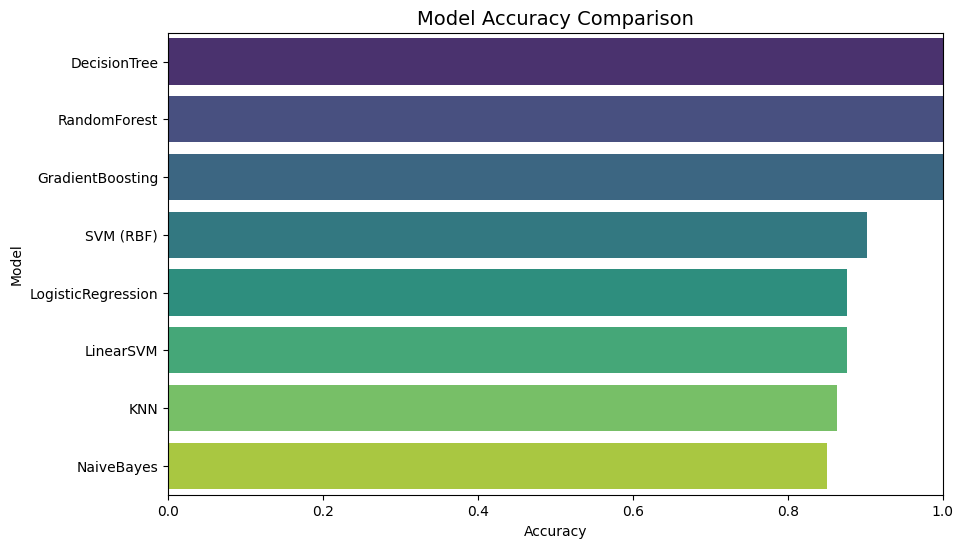

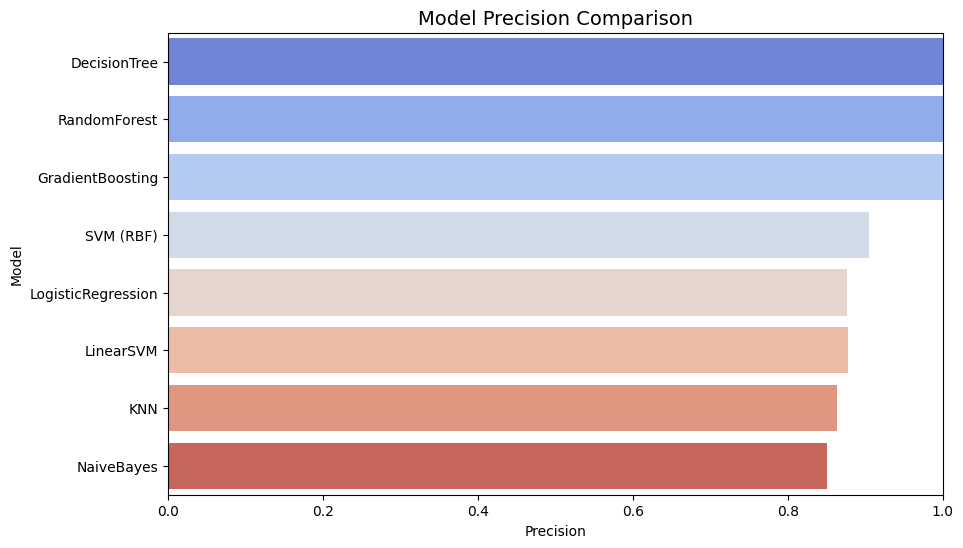

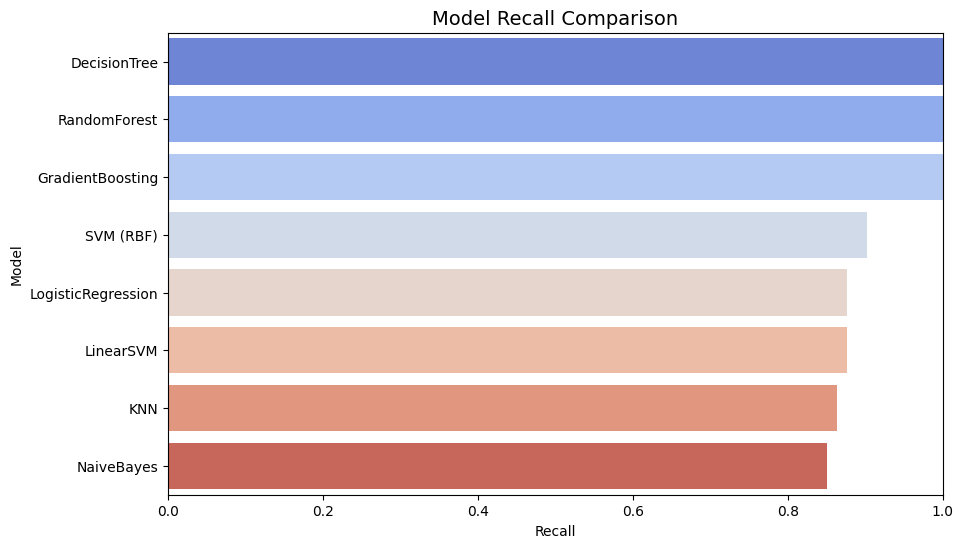

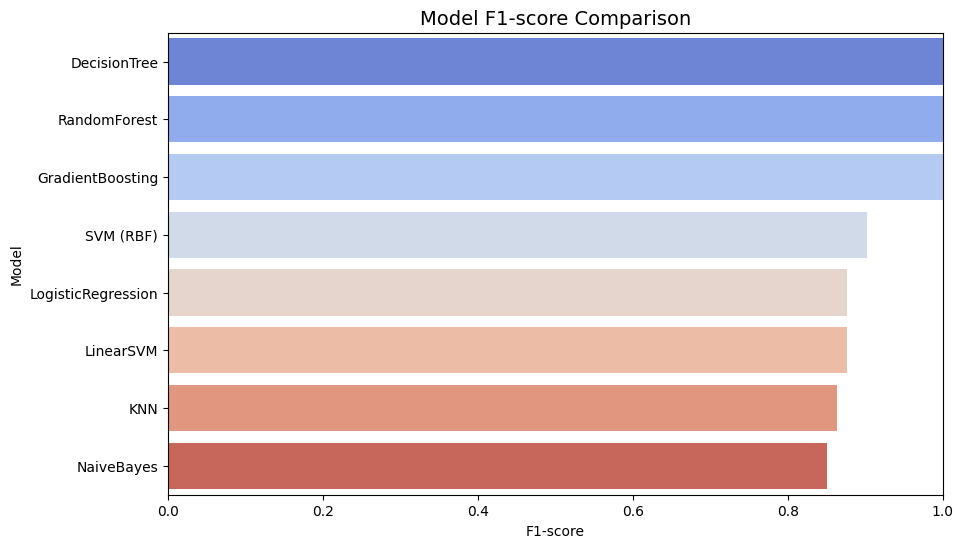

In [402]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_results, x="Accuracy", y="Model", palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()


metrics = ["Precision", "Recall", "F1-score"]
for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_results, x=metric, y="Model", palette="coolwarm")
    plt.title(f"Model {metric} Comparison", fontsize=14)
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.xlim(0, 1)
    plt.show()


In [405]:
for model_name, model in models.items():
   
    filename = f"{model_name}_model.pkl"
    joblib.dump(model, filename)
    print(f"{model_name} save in {filename}")

LogisticRegression save in LogisticRegression_model.pkl
LinearSVM save in LinearSVM_model.pkl
SVM (RBF) save in SVM (RBF)_model.pkl
KNN save in KNN_model.pkl
DecisionTree save in DecisionTree_model.pkl
RandomForest save in RandomForest_model.pkl
GradientBoosting save in GradientBoosting_model.pkl
NaiveBayes save in NaiveBayes_model.pkl
KMeans (Unsupervised) save in KMeans (Unsupervised)_model.pkl
